**Adaline (ADAptive LInear NEuron)** is another type of single layer neural network. Instead of a *unit step function* we will have a linear activation function that will spit continuous values instead of class labels.

## Gradient Descent

One of the key ways to *learn* is to define an objective function to be optimized during learning. For instance, we can define a cost function $J$ to learmn the weights as the **Sum of Squared Errors (SSE)** between the calculated outcomes and the true class labels:

$$
J(w) = \frac{1}{2} \sum_{i}(y^{(i)}-\phi(z^{(i)}))^2
$$

The $\frac{1}{2}$ term is added only for convenience, it will make it easier to derive the gradient.

We can find the minimum by subsequent steps away from the gradient $\nabla J(w)$ in this way: 

$$
w:=w + \Delta w
$$

The weight change $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\eta$:

$$
\Delta w=-\eta \nabla J(w)
$$

In [1]:
%matplotlib inline
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

To find a good $\eta$ let's plot the result with $\eta = 0.1$ and $\eta = 0.0001$

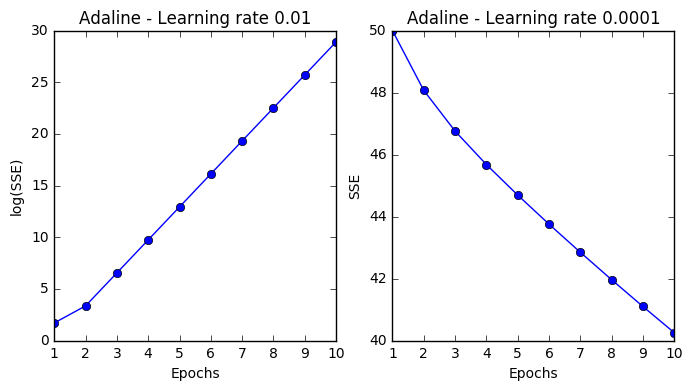

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(SSE)")
ax[0].set_title("Adaline - Learning rate 0.01")
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("SSE")
ax[1].set_title("Adaline - Learning rate 0.0001")